In [3]:
%matplotlib inline
# %pylab ipympl # Uncomment this line for interactive plots

# Introduction

This notebook demonstrates how to load array data (numerical list, numpy array) data collected into a PODPAC node.

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file.*</small>

## Setup

Make sure you have PODPAC installed:

```
$ pip install podpac
```


## Array Data

In [4]:
from podpac.data import Array
from podpac import Coordinates
import numpy as np

# mock data
data = np.random.rand(5, 5)
data

array([[0.89753206, 0.4551435 , 0.28382869, 0.44403867, 0.02593309],
       [0.39870073, 0.70196424, 0.38103463, 0.07177905, 0.23604643],
       [0.92391556, 0.09860112, 0.36086188, 0.4224398 , 0.24218811],
       [0.21650811, 0.01237827, 0.35128491, 0.90066121, 0.52795361],
       [0.59974607, 0.71935623, 0.4307461 , 0.34900224, 0.15450644]])

In [5]:
# create native coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates (EPSG:4326)
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']

In [6]:
# create Array DataSource node
node = Array(source=data, native_coordinates=native_coords)
node

Array DataSource
	source: 
[[0.89753206 0.4551435  0.28382869 0.44403867 0.02593309]
 [0.39870073 0.70196424 0.38103463 0.07177905 0.23604643]
 [0.92391556 0.09860112 0.36086188 0.4224398  0.24218811]
 [0.21650811 0.01237827 0.35128491 0.90066121 0.52795361]
 [0.59974607 0.71935623 0.4307461  0.34900224 0.15450644]]
	native_coordinates: 
		lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
		lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	interpolation: nearest

In [7]:
# evaluate this note at its native coordinates
output = node.eval(node.native_coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.897532, 0.455143, 0.283829, 0.444039, 0.025933],
       [0.398701, 0.701964, 0.381035, 0.071779, 0.236046],
       [0.923916, 0.098601, 0.360862, 0.42244 , 0.242188],
       [0.216508, 0.012378, 0.351285, 0.900661, 0.527954],
       [0.599746, 0.719356, 0.430746, 0.349002, 0.154506]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x000001B0B88D6A20>
    crs:          EPSG:4326

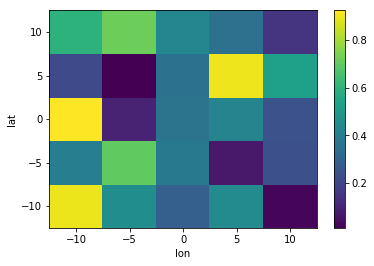

In [8]:
output.plot()
pass

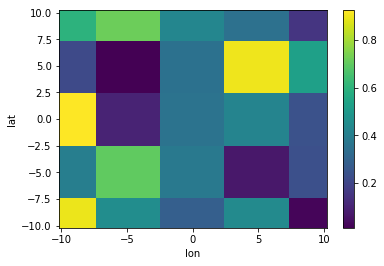

In [9]:
# scale down data (higher resolution)
# default interpolation is nearest neighbor
coords = Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

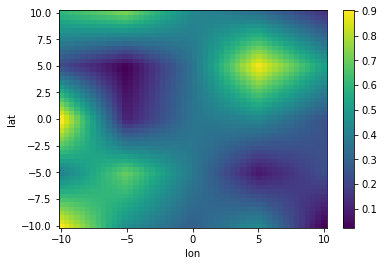

In [10]:
# scale down (higher resolution) and use bilinear interpolation
node.interpolation = 'bilinear'
output = node.eval(coords)
output.plot()
pass